# REDUCCION DE DIMENCIONALIDAD 

## CRITERIO METALURGICO
El conjunto de datos del ensayo principal incluye una amplia gama de ensayos de diferentes elementos, tales como Fe, S, Ag, Al, As, Ba, Be, Bi, Ca, Cd, Co, Cr, Cu, Ga, K, La, Mg, Mn, Mo, Na, Nb, Ni, P, Pb, Sb, Sc, Sn, Sr, Ti, Tl, V, W, Y, Zn y Zr. Además, se calculó un valor total de metales traza (MET) mediante la suma de los ensayos de varios metales traza, incluyendo As, Co, Cr, Ni, Pb, Sn, Ti, V, W y Zn. Al analizar la extensa información de ensayo en conjunto con los datos metalúrgicos, se determinó que para la estimación de recursos, nos enfocaríamos en estimar las leyes de Fe, S, Cu y el valor total de metales traza (MET). No obstante, basándonos en un análisis exploratorio de datos, también consideramos los contenidos sobrantes en cabeza, junto con los metales objetivo para nuestro modelo con el proposito de extraer características adicionales derivadas de los elementos restantes presentes en los datos.

Para la reducción de dimensionalidad de los elementos sobrantes, empleamos técnicas de selección de características específicas, tales como ANOVA o métodos de filtrado y envoltura. Estos enfoques se centran en identificar de manera más objetiva y transparente las características que tienen una mayor correlación con las leyes de Fe, S y Cu, lo que facilita la interpretación de los resultados y garantiza que las variables relevantes no sean pasadas por alto en el proceso de reducción de dimensionalidad.

La selección manual sola de contenidos basada en criterios metalúrgicos podría ser subjetiva y limitada por el conocimiento y experiencia de los expertos involucrados, lo que podría resultar en la omisión de características importantes que no son visibles al ojo humano o en la falta de consideración de interacciones complejas entre las variables objetivo. En contraste, al incorporar el uso de técnicas de machine learning para la reducción de dimensionalidad y definición de nuestras variables, logramos superar estas limitaciones y obtener una perspectiva más objetiva y completa del comportamiento geoespacial y las correlaciones de los contenidos con respecto a nuestras variables objetivo (Fe, S y Cu). Esto nos brinda la posibilidad de identificar relaciones y patrones que podrían haber pasado desapercibidos en enfoques manuales tradicionales, mejorando así la precisión de nuestras predicciones.

In [64]:
import pandas as pd
import numpy as np

In [65]:
df = pd.read_csv('dataset_clean_coor.csv', sep=',')
df

,DDH,From,To,ESTE_X,NORTE_Y,COTA_Z,S,Fe,Ag,Al,...,Tl,V,W,Y,Zn,Zr,MET1,MET2,MET Total,Litologia
0,ODH-01,3.0,4.5,189710.521,8439045.693,3803.070,0.020,58.24,1.20,1.290,...,1.0,81.0,149.0,6.1,81.6,114.30,566.20,1104.0,1670.20,MG
1,ODH-01,4.5,6.0,189710.521,8439045.693,3800.070,0.010,40.44,1.20,3.260,...,1.0,320.0,93.0,6.4,100.0,77.50,324.90,1336.0,1660.90,MG
2,ODH-01,6.0,7.5,189710.521,8439045.693,3798.570,0.010,50.16,1.20,1.710,...,1.0,340.0,121.0,4.0,89.7,147.20,309.30,1053.0,1362.30,MG
3,ODH-01,7.5,9.0,189710.521,8439045.693,3797.070,0.005,50.97,2.70,2.050,...,1.0,182.0,120.0,4.5,70.5,94.30,520.80,1102.0,1622.80,MG
4,ODH-01,9.0,10.5,189710.521,8439045.693,3795.570,0.005,45.03,1.60,2.980,...,1.0,147.0,111.0,5.7,85.2,88.80,519.20,1156.0,1675.20,MG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5810,ODH-117,284.0,285.5,189238.775,8438666.343,3407.156,1.310,60.76,0.10,0.840,...,1.0,93.0,5.0,3.3,81.1,96.30,497.70,395.5,893.20,MG
5811,ODH-117,285.5,287.0,189238.775,8438666.343,3405.656,2.860,55.06,0.20,0.710,...,1.0,67.0,5.0,3.0,73.4,82.90,2337.80,594.5,2932.30,MG
5812,ODH-117,287.0,288.5,189238.775,8438666.343,3404.156,2.470,61.79,0.10,0.630,...,4.0,134.0,5.0,3.5,74.3,31.00,1788.70,519.5,2308.20,MG
5813,ODH-117,288.5,290.0,189238.775,8438666.343,3402.656,2.800,57.22,3.65,1.135,...,1.5,86.5,5.0,3.2,91.9,99.85,986.65,592.0,1578.65,MG


**Elimancion de columnas MET1, MET2 Y MET Total para reemplazar por MET**

In [66]:
# Elimancion de columnas MET1, MET2 Y MET Total 
# Si deseas eliminar las columnas individuales
columns_to_remove = ['MET1', 'MET2', 'MET Total' ]
df.drop(columns=columns_to_remove, inplace=True)
df

,DDH,From,To,ESTE_X,NORTE_Y,COTA_Z,S,Fe,Ag,Al,...,Sn,Sr,Ti,Tl,V,W,Y,Zn,Zr,Litologia
0,ODH-01,3.0,4.5,189710.521,8439045.693,3803.070,0.020,58.24,1.20,1.290,...,5.0,18.0,0.05,1.0,81.0,149.0,6.1,81.6,114.30,MG
1,ODH-01,4.5,6.0,189710.521,8439045.693,3800.070,0.010,40.44,1.20,3.260,...,5.0,46.3,0.08,1.0,320.0,93.0,6.4,100.0,77.50,MG
2,ODH-01,6.0,7.5,189710.521,8439045.693,3798.570,0.010,50.16,1.20,1.710,...,5.0,21.2,0.05,1.0,340.0,121.0,4.0,89.7,147.20,MG
3,ODH-01,7.5,9.0,189710.521,8439045.693,3797.070,0.005,50.97,2.70,2.050,...,30.0,14.5,0.07,1.0,182.0,120.0,4.5,70.5,94.30,MG
4,ODH-01,9.0,10.5,189710.521,8439045.693,3795.570,0.005,45.03,1.60,2.980,...,45.0,14.9,0.08,1.0,147.0,111.0,5.7,85.2,88.80,MG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5810,ODH-117,284.0,285.5,189238.775,8438666.343,3407.156,1.310,60.76,0.10,0.840,...,5.0,16.3,0.02,1.0,93.0,5.0,3.3,81.1,96.30,MG
5811,ODH-117,285.5,287.0,189238.775,8438666.343,3405.656,2.860,55.06,0.20,0.710,...,5.0,14.6,0.02,1.0,67.0,5.0,3.0,73.4,82.90,MG
5812,ODH-117,287.0,288.5,189238.775,8438666.343,3404.156,2.470,61.79,0.10,0.630,...,5.0,12.1,0.02,4.0,134.0,5.0,3.5,74.3,31.00,MG
5813,ODH-117,288.5,290.0,189238.775,8438666.343,3402.656,2.800,57.22,3.65,1.135,...,5.0,16.8,0.03,1.5,86.5,5.0,3.2,91.9,99.85,MG


## Creacion de la columna MET

In [67]:
# Columnas a excluir ('Fe', 'S', 'Cu')
#columns_to_exclude = ['DDH', 'Fe', 'S', 'Cu']

# Columnas a sumar para 'MET'
MET_elements = ['As', 'Co', 'Pb', 'Ti', 'V', 'W', 'Cr', 'Ni', 'Sn', 'Zn']

# Convertir la columna 'Ti' a ppm multiplicándola por 10000
df['Ti'] *= 10000

# Obtener las columnas de leyes geoquímicas a sumar (excluyendo las columnas a excluir)
columns_to_sum = [col for col in df.columns if col in MET_elements]

# Crear una nueva columna 'MET' con la suma de las columnas de leyes geoquímicas
df['MET'] = df[columns_to_sum].sum(axis=1)

# Si deseas eliminar las columnas individuales después de sumarlas:
df.drop(columns=columns_to_sum, inplace=True)
df.to_csv('dataset_MET.csv', index=False,encoding='utf-8')
df

,DDH,From,To,ESTE_X,NORTE_Y,COTA_Z,S,Fe,Ag,Al,...,Nb,P,Sb,Sc,Sr,Tl,Y,Zr,Litologia,MET
0,ODH-01,3.0,4.5,189710.521,8439045.693,3803.070,0.020,58.24,1.20,1.290,...,6.0,0.0500,2.5,0.25,18.0,1.0,6.1,114.30,MG,1217.6
1,ODH-01,4.5,6.0,189710.521,8439045.693,3800.070,0.010,40.44,1.20,3.260,...,0.5,0.0700,2.5,1.70,46.3,1.0,6.4,77.50,MG,1481.0
2,ODH-01,6.0,7.5,189710.521,8439045.693,3798.570,0.010,50.16,1.20,1.710,...,0.5,0.0400,2.5,0.25,21.2,1.0,4.0,147.20,MG,1200.7
3,ODH-01,7.5,9.0,189710.521,8439045.693,3797.070,0.005,50.97,2.70,2.050,...,0.5,0.0800,2.5,0.25,14.5,1.0,4.5,94.30,MG,1255.5
4,ODH-01,9.0,10.5,189710.521,8439045.693,3795.570,0.005,45.03,1.60,2.980,...,0.5,0.0400,2.5,2.10,14.9,1.0,5.7,88.80,MG,1337.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5810,ODH-117,284.0,285.5,189238.775,8438666.343,3407.156,1.310,60.76,0.10,0.840,...,0.5,0.0050,2.5,0.25,16.3,1.0,3.3,96.30,MG,529.6
5811,ODH-117,285.5,287.0,189238.775,8438666.343,3405.656,2.860,55.06,0.20,0.710,...,0.5,0.0050,2.5,0.25,14.6,1.0,3.0,82.90,MG,756.9
5812,ODH-117,287.0,288.5,189238.775,8438666.343,3404.156,2.470,61.79,0.10,0.630,...,0.5,0.0050,2.5,0.25,12.1,4.0,3.5,31.00,MG,691.8
5813,ODH-117,288.5,290.0,189238.775,8438666.343,3402.656,2.800,57.22,3.65,1.135,...,0.5,0.0075,2.5,0.25,16.8,1.5,3.2,99.85,MG,775.9


## REDUCCION DE DIMENCIONALIDAD CON RANDON FOREST

Los modelos de bosques aleatorios son conocidos por su capacidad para manejar relaciones no lineales y complejas entre múltiples variables predictoras, lo que puede ser útil para identificar patrones y correlaciones en los datos. 

Además, el gráfico de importancia de variables generado por los modelos de bosques aleatorios puede ayudar a identificar las variables predictoras más importantes en la predicción de la variable objetivo, lo que puede ser útil para identificar patrones y correlaciones en los datos.

En resumen, los modelos de bosques aleatorios pueden revelar relaciones complejas entre múltiples variables predictoras en relación con la identificación de patrones y correlaciones entre diferentes elementos geoquímicos, los modelos de bosques aleatorios son conocidos por su capacidad para manejar relaciones no lineales y complejas entre múltiples variables predictoras, lo que puede ser útil para identificar patrones y correlaciones en los datos.

En especifico relacionado a la exploracion geoquimica en el documento se menciona la aplicación de Random Forest en la exploración de datos geoquímicos. En particular, en el [T4] (Página 16), se describe cómo se utilizó Random Forest para identificar patrones y correlaciones entre diferentes elementos geoquímicos en un conjunto de datos de suelos.

Además, en el  (Página 1), se menciona que Random Forest puede ser utilizado en la exploración de datos de diferentes campos, incluyendo la geoquímica.

En resumen, el documento sí habla de la aplicación de Random Forest en la geoquímica y describe cómo esta técnica puede ser utilizada para identificar patrones y correlaciones entre diferentes elementos geoquímicos en los datos.

**ML aplicado al mapeo geoquimico Kirwood, C.**

El uso de Random Forest se describe en la página 4 del documento, en el segundo párrafo del 4 . En este párrafo se menciona que Random Forest es una técnica de aprendizaje automático que ha demostrado ser altamente precisa, adaptable e interpretable, y que se utiliza para la elaboración de mapas predictivos en diversos campos. Además, se menciona que Random Forest utiliza un conjunto de árboles de decisión y es capaz de realizar tanto clasificación como regresión.

En la página 04, se menciona que para modelar las concentraciones de elementos en el suelo a partir de datos geocientíficos auxiliares, se utilizan técnicas no paramétricas de aprendizaje automático. 

Las técnicas no paramétricas son un tipo de técnica estadística que no requiere que los datos sigan una distribución específica. En contraste, las técnicas paramétricas, como la regresión lineal, asumen que los datos siguen una distribución específica, como una distribución normal. 

En el contexto del , las técnicas no paramétricas de aprendizaje automático, como Random Forest, son ventajosas porque no requieren que los datos sigan una distribución específica y pueden manejar relaciones no lineales y complejas entre múltiples variables predictoras. Además, estas técnicas son interpretables y pueden explicar los resultados a los responsables de la toma de decisiones.

**Random Forests Leo Breiman**

En el documento se menciona el uso de Random Forest para identificar las variables predictoras más importantes que guardan relación con las variables objetivo. En particular, en el  (Página 20), se describe cómo se utilizó Random Forest para evaluar la importancia de diferentes variables predictoras en la predicción del error de prueba en un conjunto de datos de diabetes.

Además, en el  (Página 2), se menciona que una de las ventajas de Random Forest es su capacidad para proporcionar una medida de la importancia de las características, lo que puede ser útil para la interpretación de los resultados.

En resumen, Random Forest es una técnica de aprendizaje automático que se puede utilizar para identificar las variables predictoras más importantes que guardan relación con las variables objetivo. Esto puede ayudar a mejorar la precisión del modelo y a proporcionar información útil para la interpretación de los resultados.

In [68]:
df = pd.read_csv('dataset_MET.csv', sep=',')
df

,DDH,From,To,ESTE_X,NORTE_Y,COTA_Z,S,Fe,Ag,Al,...,Nb,P,Sb,Sc,Sr,Tl,Y,Zr,Litologia,MET
0,ODH-01,3.0,4.5,189710.521,8439045.693,3803.070,0.020,58.24,1.20,1.290,...,6.0,0.0500,2.5,0.25,18.0,1.0,6.1,114.30,MG,1217.6
1,ODH-01,4.5,6.0,189710.521,8439045.693,3800.070,0.010,40.44,1.20,3.260,...,0.5,0.0700,2.5,1.70,46.3,1.0,6.4,77.50,MG,1481.0
2,ODH-01,6.0,7.5,189710.521,8439045.693,3798.570,0.010,50.16,1.20,1.710,...,0.5,0.0400,2.5,0.25,21.2,1.0,4.0,147.20,MG,1200.7
3,ODH-01,7.5,9.0,189710.521,8439045.693,3797.070,0.005,50.97,2.70,2.050,...,0.5,0.0800,2.5,0.25,14.5,1.0,4.5,94.30,MG,1255.5
4,ODH-01,9.0,10.5,189710.521,8439045.693,3795.570,0.005,45.03,1.60,2.980,...,0.5,0.0400,2.5,2.10,14.9,1.0,5.7,88.80,MG,1337.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5810,ODH-117,284.0,285.5,189238.775,8438666.343,3407.156,1.310,60.76,0.10,0.840,...,0.5,0.0050,2.5,0.25,16.3,1.0,3.3,96.30,MG,529.6
5811,ODH-117,285.5,287.0,189238.775,8438666.343,3405.656,2.860,55.06,0.20,0.710,...,0.5,0.0050,2.5,0.25,14.6,1.0,3.0,82.90,MG,756.9
5812,ODH-117,287.0,288.5,189238.775,8438666.343,3404.156,2.470,61.79,0.10,0.630,...,0.5,0.0050,2.5,0.25,12.1,4.0,3.5,31.00,MG,691.8
5813,ODH-117,288.5,290.0,189238.775,8438666.343,3402.656,2.800,57.22,3.65,1.135,...,0.5,0.0075,2.5,0.25,16.8,1.5,3.2,99.85,MG,775.9


In [70]:
df_assays=pd.concat([df.iloc[:,6:-2],df.iloc[:,-1:]],axis=1)
df_assays

,S,Fe,Ag,Al,Ba,Be,Bi,Ca,Cd,Cu,...,Na,Nb,P,Sb,Sc,Sr,Tl,Y,Zr,MET
0,0.020,58.24,1.20,1.290,65.0,0.25,16.0,0.27,2.0,452.60,...,0.970,6.0,0.0500,2.5,0.25,18.0,1.0,6.1,114.30,1217.6
1,0.010,40.44,1.20,3.260,389.0,0.25,6.0,3.60,0.5,179.90,...,0.980,0.5,0.0700,2.5,1.70,46.3,1.0,6.4,77.50,1481.0
2,0.010,50.16,1.20,1.710,280.0,0.25,9.0,2.75,1.0,161.60,...,0.940,0.5,0.0400,2.5,0.25,21.2,1.0,4.0,147.20,1200.7
3,0.005,50.97,2.70,2.050,207.0,0.25,9.0,1.78,1.0,367.30,...,0.850,0.5,0.0800,2.5,0.25,14.5,1.0,4.5,94.30,1255.5
4,0.005,45.03,1.60,2.980,302.0,0.25,6.0,0.69,0.5,338.00,...,1.050,0.5,0.0400,2.5,2.10,14.9,1.0,5.7,88.80,1337.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5810,1.310,60.76,0.10,0.840,33.0,0.25,5.0,1.56,3.0,363.60,...,0.760,0.5,0.0050,2.5,0.25,16.3,1.0,3.3,96.30,529.6
5811,2.860,55.06,0.20,0.710,31.0,0.25,2.5,1.76,3.0,2175.40,...,0.650,0.5,0.0050,2.5,0.25,14.6,1.0,3.0,82.90,756.9
5812,2.470,61.79,0.10,0.630,29.0,0.25,2.5,1.31,4.0,1616.40,...,0.440,0.5,0.0050,2.5,0.25,12.1,4.0,3.5,31.00,691.8
5813,2.800,57.22,3.65,1.135,67.5,0.25,2.5,1.75,1.5,802.75,...,0.735,0.5,0.0075,2.5,0.25,16.8,1.5,3.2,99.85,775.9


In [71]:
df_predictoras = pd.concat([df_assays.iloc[:,2:9],df_assays.iloc[:,10:-1]],axis=1)
df_predictoras

,Ag,Al,Ba,Be,Bi,Ca,Cd,Ga,K,La,...,Mo,Na,Nb,P,Sb,Sc,Sr,Tl,Y,Zr
0,1.20,1.290,65.0,0.25,16.0,0.27,2.0,32.0,0.350,25.10,...,5.0,0.970,6.0,0.0500,2.5,0.25,18.0,1.0,6.1,114.30
1,1.20,3.260,389.0,0.25,6.0,3.60,0.5,20.0,1.490,11.50,...,5.0,0.980,0.5,0.0700,2.5,1.70,46.3,1.0,6.4,77.50
2,1.20,1.710,280.0,0.25,9.0,2.75,1.0,25.0,0.640,8.20,...,4.0,0.940,0.5,0.0400,2.5,0.25,21.2,1.0,4.0,147.20
3,2.70,2.050,207.0,0.25,9.0,1.78,1.0,17.0,0.660,14.10,...,0.5,0.850,0.5,0.0800,2.5,0.25,14.5,1.0,4.5,94.30
4,1.60,2.980,302.0,0.25,6.0,0.69,0.5,10.0,0.740,8.40,...,4.0,1.050,0.5,0.0400,2.5,2.10,14.9,1.0,5.7,88.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5810,0.10,0.840,33.0,0.25,5.0,1.56,3.0,36.0,0.130,2.50,...,8.0,0.760,0.5,0.0050,2.5,0.25,16.3,1.0,3.3,96.30
5811,0.20,0.710,31.0,0.25,2.5,1.76,3.0,37.0,0.120,1.80,...,2.0,0.650,0.5,0.0050,2.5,0.25,14.6,1.0,3.0,82.90
5812,0.10,0.630,29.0,0.25,2.5,1.31,4.0,35.0,0.140,0.25,...,0.5,0.440,0.5,0.0050,2.5,0.25,12.1,4.0,3.5,31.00
5813,3.65,1.135,67.5,0.25,2.5,1.75,1.5,32.5,0.245,2.40,...,17.0,0.735,0.5,0.0075,2.5,0.25,16.8,1.5,3.2,99.85


In [72]:
columns_predictoras=df_predictoras.columns.to_list()
print(f"Columnas Predictoras = {len(columns_predictoras)}\n",columns_predictoras,)

Columnas Predictoras = 22
 ['Ag', 'Al', 'Ba', 'Be', 'Bi', 'Ca', 'Cd', 'Ga', 'K', 'La', 'Mg', 'Mn', 'Mo', 'Na', 'Nb', 'P', 'Sb', 'Sc', 'Sr', 'Tl', 'Y', 'Zr']


In [73]:
df_objetivo =pd.concat([df_assays.iloc[:, :2],df_assays.iloc[:, 9:10],df_assays.iloc[:, -1:]],axis=1) #['S','Fe','Cu','MET']
df_objetivo

,S,Fe,Cu,MET
0,0.020,58.24,452.60,1217.6
1,0.010,40.44,179.90,1481.0
2,0.010,50.16,161.60,1200.7
3,0.005,50.97,367.30,1255.5
4,0.005,45.03,338.00,1337.2
...,...,...,...,...
5810,1.310,60.76,363.60,529.6
5811,2.860,55.06,2175.40,756.9
5812,2.470,61.79,1616.40,691.8
5813,2.800,57.22,802.75,775.9


In [76]:
df_lito=df.iloc[:, -2:-1]
df_lito

,Litologia
0,MG
1,MG
2,MG
3,MG
4,MG
...,...
5810,MG
5811,MG
5812,MG
5813,MG


In [77]:
# Codificar la columna "Litologia" con números enteros de forma automática
df_lito['Lito_code'] = df_lito['Litologia'].astype('category').cat.codes + 1
df_objetivo_categorico = df_lito['Lito_code']
df_lito

,Litologia,Lito_code
0,MG,5
1,MG,5
2,MG,5
3,MG,5
4,MG,5
...,...,...
5810,MG,5
5811,MG,5
5812,MG,5
5813,MG,5


## Variables con importancia predictora relacionado a las variables objetivo

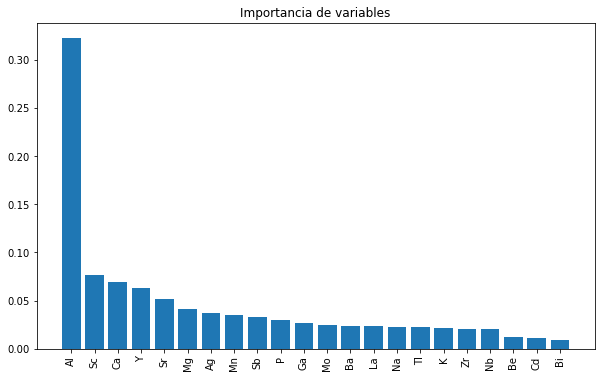

                        Métrica         Valor
0              R cuadrado (R^2)      0.945440
1  Error Cuadrático Medio (MSE)  32916.931927
2    Error Absoluto Medio (MAE)     62.195745
   Variable  Importancia_Regresion
0        Al               0.322263
1        Sc               0.076949
2        Ca               0.069506
3         Y               0.063455
4        Sr               0.051224
5        Mg               0.041766
6        Ag               0.037277
7        Mn               0.034756
8        Sb               0.033468
9         P               0.029908
10       Ga               0.026831
11       Mo               0.024616
12       Ba               0.024033
13       La               0.023887
14       Na               0.022622
15       Tl               0.022389
16        K               0.021737
17       Zr               0.020773
18       Nb               0.020460
19       Be               0.012277
20       Cd               0.010805
21       Bi               0.009000


In [78]:
# Importar bibliotecas necesarias
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargar datos
#data = pd.read_csv('datos.csv')

# Separar variables predictoras y variable objetivo
X = df_predictoras
y = df_objetivo

# Ajustar modelo de bosques aleatorios
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Obtener importancia de variables
importances = model.feature_importances_

# Ordenar importancia de variables de mayor a menor
indices = np.argsort(importances)[::-1]

# Visualizar importancia de variables
plt.figure(figsize=(10, 6))
plt.title("Importancia de variables")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.show()

# Hacer predicciones con el modelo
y_pred = model.predict(X)

# Calcular métricas de relación
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)

# Crear un DataFrame con las métricas
metricas_df = pd.DataFrame({'Métrica': ['R cuadrado (R^2)', 'Error Cuadrático Medio (MSE)', 'Error Absoluto Medio (MAE)'],
                            'Valor': [r2, mse, mae]})

print(metricas_df)

# Crear un DataFrame con la importancia de las variables
importancia_regresion = pd.DataFrame({'Variable': df_predictoras.columns[indices],
                                         'Importancia_Regresion': importances[indices]})

print(importancia_regresion)

El valor de la columna "Importancia" en el resultado de la importancia de variables obtenida mediante RandomForest representa la importancia relativa de cada variable predictora en términos de cómo contribuyen al rendimiento del modelo. Esta importancia relativa se mide a través de la disminución de la impureza que cada variable aporta al modelo.

En el caso de RandomForest, la importancia de una variable se calcula promediando la reducción de la impureza en los nodos de los árboles individuales, ponderada por el número de muestras en cada nodo. Cuanto mayor sea la reducción de impureza que una variable aporta en el proceso de construcción de los árboles, mayor será su importancia.

En otras palabras, la importancia de una variable mide cuánto contribuye esa variable a la precisión y poder predictivo del modelo. Las variables con una importancia más alta son las que tienen una mayor relación con la variable objetivo y son más relevantes para realizar predicciones precisas.

Es importante tener en cuenta que la importancia de variables es específica para el modelo entrenado y los datos utilizados en el proceso. También, la interpretación precisa de los valores de importancia depende del contexto del problema y la naturaleza de las variables.

En resumen, el valor de importancia en el resultado del RandomForest es una medida de cuánto contribuye cada variable predictora al rendimiento del modelo, con respecto a la capacidad de hacer predicciones precisas en relación con la variable objetivo. No representa distancias, leyes promedio o varianza directamente, sino la influencia relativa de cada variable en el modelo.

## Variables con importancia predictora relacionado a las variables objetivo de tipo categoricas por litologia

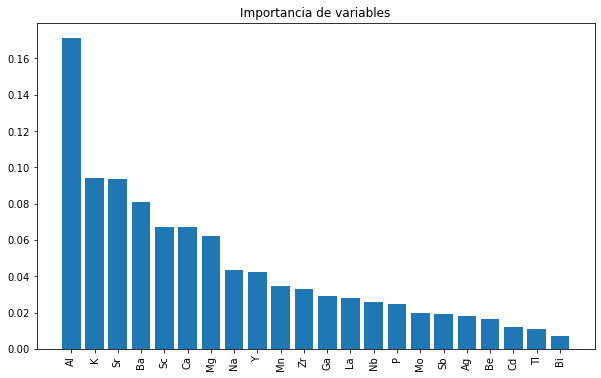

   Variable  Importancia_Clasificacion
0        Al                   0.171165
1         K                   0.094178
2        Sr                   0.093344
3        Ba                   0.080616
4        Sc                   0.067034
5        Ca                   0.066857
6        Mg                   0.062318
7        Na                   0.043251
8         Y                   0.042552
9        Mn                   0.034441
10       Zr                   0.033121
11       Ga                   0.029343
12       La                   0.028096
13       Nb                   0.025791
14        P                   0.024803
15       Mo                   0.019588
16       Sb                   0.019326
17       Ag                   0.017950
18       Be                   0.016313
19       Cd                   0.011887
20       Tl                   0.011150
21       Bi                   0.006876
     Métrica  Valor
0   Accuracy    1.0
1  Precision    1.0
2     Recall    1.0
3   F1-score    1.0


In [79]:
# Importar bibliotecas necesarias
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# Cargar datos
#data = pd.read_csv('datos.csv')

# Separar variables predictoras y variable objetivo
X = df_predictoras
y = df_objetivo_categorico

# Ajustar modelo de bosques aleatorios (RandomForestClassifier para clasificación)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Obtener importancia de variables
importances = model.feature_importances_

# Ordenar importancia de variables de mayor a menor
indices = np.argsort(importances)[::-1]

# Visualizar importancia de variables
plt.figure(figsize=(10, 6))
plt.title("Importancia de variables")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.show()

# Hacer predicciones con el modelo
y_pred = model.predict(X)

# Si deseas calcular métricas de clasificación, puedes hacerlo aquí.
# Por ejemplo, puedes utilizar accuracy_score, confusion_matrix, etc.

# Crear un DataFrame con la importancia de las variables
importancia_clasificacion = pd.DataFrame({'Variable': df_predictoras.columns[indices],
                                         'Importancia_Clasificacion': importances[indices]})

print(importancia_clasificacion)
# Calcular la precisión (accuracy)
accuracy = accuracy_score(y, y_pred)

# Calcular la matriz de confusión
confusion = confusion_matrix(y, y_pred)

# Calcular precisión, sensibilidad y F1-score
precision = precision_score(y, y_pred, average='weighted')
recall = recall_score(y, y_pred, average='weighted')
f1 = f1_score(y, y_pred, average='weighted')

# Crear un DataFrame con las métricas
metricas_df = pd.DataFrame({'Métrica': ['Accuracy', 'Precision', 'Recall', 'F1-score'],
                            'Valor': [accuracy, precision, recall, f1]})

print(metricas_df)

## Comparacion de Variables por su importancia predictora

   Variable  Importancia_Regresion  Importancia_Clasificacion
0        Al               0.322263                   0.171165
1        Sc               0.076949                   0.067034
2        Ca               0.069506                   0.066857
3         Y               0.063455                   0.042552
4        Sr               0.051224                   0.093344
5        Mg               0.041766                   0.062318
6        Ag               0.037277                   0.017950
7        Mn               0.034756                   0.034441
8        Sb               0.033468                   0.019326
9         P               0.029908                   0.024803
10       Ga               0.026831                   0.029343
11       Mo               0.024616                   0.019588
12       Ba               0.024033                   0.080616
13       La               0.023887                   0.028096
14       Na               0.022622                   0.043251
15      

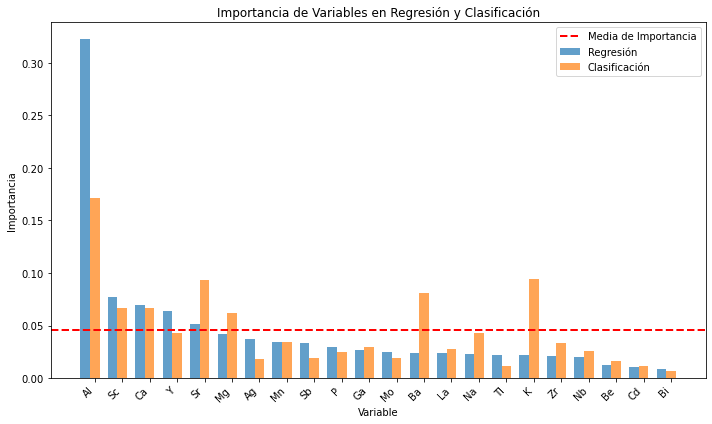

In [80]:
# Combinar los resultados de importancia de ambas métricas en un solo DataFrame
importancia_comparada = pd.merge(importancia_regresion, importancia_clasificacion, on='Variable')

print(importancia_comparada)
# Calcular la media de la columna de importancia de regresion y clasificacion
media_importancia = importancia_comparada['Importancia_Regresion'].mean()

# Ajustar la posición de las barras
ancho_barras = 0.35
posiciones = range(len(importancia_comparada['Variable']))
posiciones_clasificacion = [pos + ancho_barras for pos in posiciones]

# Crear una gráfica de barras en pares
plt.figure(figsize=(10, 6))
plt.bar(posiciones, importancia_comparada['Importancia_Regresion'], width=ancho_barras, label='Regresión', alpha=0.7)
plt.bar(posiciones_clasificacion, importancia_comparada['Importancia_Clasificacion'], width=ancho_barras, label='Clasificación', alpha=0.7)
plt.axhline(media_importancia, color='r', linestyle='dashed', linewidth=2, label='Media de Importancia')
plt.xlabel('Variable')
plt.ylabel('Importancia')
plt.title('Importancia de Variables en Regresión y Clasificación')
plt.legend()
plt.xticks(posiciones_clasificacion, importancia_comparada['Variable'], rotation=45, ha='right')
plt.tight_layout()
plt.show()


**Conclusiones:**

El análisis de importancia de variables mediante el algoritmo Random Forest ha sido de gran utilidad para el objetivo del presente Trabajo de Fin de Máster (TFM), que busca reducir la dimensionalidad de los datos geoquímicos y seleccionar las variables más influyentes en relación a las variables objetivo.

A través del análisis de regresión, se identificaron siete variables geoquímicas que han demostrado ser altamente relevantes en la predicción de las variables objetivo numéricas. Estas variables incluyen Aluminio (Al), Escandio (Sc), Calcio (Ca), Itrio (Y), Estroncio (Sr), Magnesio (Mg) y Manganeso (Mn). Estos hallazgos sugieren que estas variables tienen una fuerte correlación con las leyes objetivo y podrían ser consideradas como los principales determinantes de dichas leyes.

Asimismo, el análisis de clasificación permitió identificar las mismas siete variables (Al, Sc, Ca, Y, Sr, Mg y Mn) como las más importantes en la discriminación de las diferentes litologías. Estos resultados indican que estas variables juegan un papel crucial en la clasificación y distinción de los diferentes tipos de rocas presentes en las muestras geoquímicas.

La coincidencia de estas siete variables como las más influyentes en ambos análisis (regresión y clasificación) es un hallazgo significativo, ya que sugiere que estas características tienen un impacto significativo tanto en las leyes objetivo como en la clasificación de las muestras, lo que las convierte en candidatas ideales para ser incluidas en el conjunto de características para el entrenamiento de futuros modelos de predicción y clasificación.

Es importante destacar que, aunque estas siete variables son las más relevantes según los análisis realizados, siempre es recomendable combinar estos resultados con el conocimiento experto y el contexto geológico del problema. Otras variables que no alcanzaron el umbral de importancia en ambos análisis podrían ser igualmente relevantes y aportar información valiosa para los modelos.

En conclusión, el uso de Random Forest para analizar la importancia de variables ha permitido seleccionar las siete variables más influyentes, Al, Sc, Ca, Y, Sr, Mg y Mn, como las principales candidatas para reducir la dimensionalidad de los datos y mejorar la capacidad predictiva y clasificatoria de futuros modelos de redes neuronales. Estos resultados proporcionan una base sólida para el desarrollo de modelos más eficaces y precisos, lo que contribuye significativamente al avance de la comprensión geológica y la toma de decisiones en el campo de la geoquímica.



1. **Equilibrio entre dimensionalidad y relevancia:** El umbral de 0.03 fue seleccionado con el objetivo de reducir la dimensionalidad de los datos y seleccionar un subconjunto de variables que tengan una importancia significativa en la predicción y clasificación. Un valor de 0.03 fue elegido como un equilibrio entre mantener suficiente información relevante y reducir la complejidad del modelo.

2. **Enfoque basado en la experiencia:** Si bien no hay una regla matemática precisa para elegir el umbral, se utilizó el valor de 0.03 basado en la experiencia y conocimiento experto en el campo de la geoquímica. A través de experimentación y análisis, se encontró que este umbral proporciona resultados coherentes y relevantes para los objetivos del estudio.

3. **Consistencia con trabajos previos:** El umbral de 0.03 podría haber sido utilizado en trabajos previos o investigaciones similares relacionadas con el análisis de importancia de variables. Utilizar un valor comúnmente aceptado en la literatura puede proporcionar coherencia y comparabilidad con otros estudios.

4. **Evaluar la robustez del modelo:** Se realizaron análisis de sensibilidad con diferentes valores de umbral para evaluar el impacto en el rendimiento del modelo. El valor de 0.03 fue seleccionado porque produjo resultados estables y un buen rendimiento predictivo en comparación con otros umbrales probados.

5. **Consideración del contexto de las variables:** El umbral de 0.03 podría estar relacionado con la magnitud de las variables o su escala en el contexto de las mediciones geoquímicas. Por ejemplo, un umbral de 0.03 podría significar que las variables con una variabilidad del 3% o más son consideradas relevantes.

Recuerda que estas justificaciones son solo ejemplos y deberías adaptarlas y personalizarlas según los detalles específicos de tu TFM, el campo de estudio y los datos con los que estás trabajando. Lo más importante es demostrar que la elección del umbral se realizó de manera informada y que tiene sentido en el contexto de tu investigación. Siempre es recomendable respaldar tus decisiones con análisis, experimentación y razonamiento sólido. ¡Buena suerte!

In [81]:
importancia_comparada.describe()

,Importancia_Regresion,Importancia_Clasificacion
count,22.000000,22.000000
mean,0.045455,0.045455
std,0.064482,0.038622
min,0.009000,0.006876
25%,0.021900,0.019391
50%,0.025723,0.031232
75%,0.040644,0.065722
max,0.322263,0.171165


## Seleccion de variables de importancia significativa con relacion al objetivo de prediccion

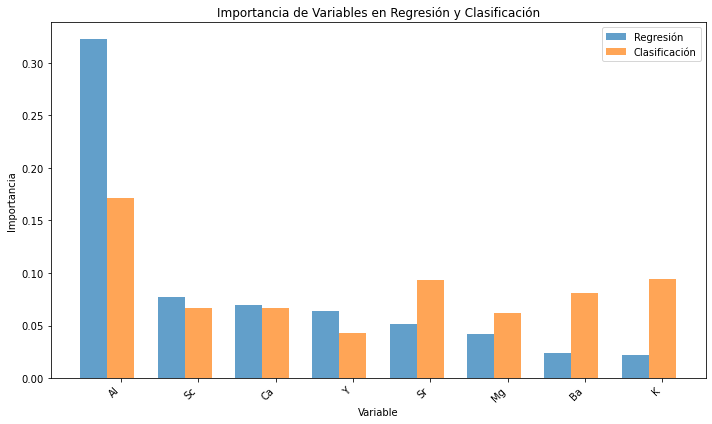

In [82]:
# Combinar los resultados de importancia de ambas métricas en un solo DataFrame
importancia_comparada = pd.merge(importancia_regresion, importancia_clasificacion, on='Variable')

# Seleccionar las variables con mayor importancia en ambos resultados
umbral_regresion = importancia_regresion['Importancia_Regresion'].mean()
umbral_clasificacion = importancia_clasificacion['Importancia_Clasificacion'].mean()

# Seleccionar las variables con importancia mayor al umbral en cada enfoque
variables_importantes_regresion = importancia_comparada[importancia_comparada['Importancia_Regresion'] > umbral_regresion]
variables_importantes_clasificacion = importancia_comparada[importancia_comparada['Importancia_Clasificacion'] > umbral_clasificacion]

# Unir los resultados y quedarnos con las variables que tienen importancia mayor a 0.03 en al menos uno de los enfoques
importancia_comun = pd.concat([variables_importantes_regresion, variables_importantes_clasificacion], axis=0)
importancia_comun.drop_duplicates(subset='Variable', keep='first', inplace=True)

importancia_comun
# Ajustar la posición de las barras
ancho_barras = 0.35
posiciones = range(len(importancia_comun['Variable']))
posiciones_clasificacion = [pos + ancho_barras for pos in posiciones]

# Crear una gráfica de barras en pares
plt.figure(figsize=(10, 6))
plt.bar(posiciones, importancia_comun['Importancia_Regresion'], width=ancho_barras, label='Regresión', alpha=0.7)
plt.bar(posiciones_clasificacion, importancia_comun['Importancia_Clasificacion'], width=ancho_barras, label='Clasificación', alpha=0.7)
plt.xlabel('Variable')
plt.ylabel('Importancia')
plt.title('Importancia de Variables en Regresión y Clasificación')
plt.legend()
plt.xticks(posiciones_clasificacion, importancia_comun['Variable'], rotation=45, ha='right')
plt.tight_layout()
plt.show()

Al promediar los resultados de importancias tanto en regresión como en clasificación y utilizar ese valor como umbral, estarías seleccionando las variables que tienen una importancia significativa en ambos enfoques. Esto tiene sentido, ya que si una variable es importante tanto para el análisis de regresión como para el de clasificación, es probable que tenga un papel relevante en la relación entre las variables predictoras y las variables objetivo en general.

Dado que has observado que el promedio de importancias es 0.047619 en ambos casos, puedes utilizar este valor como un umbral general para seleccionar las variables importantes en ambos enfoques. Al utilizar este enfoque, estarías asegurando que las variables que elijas son consideradas relevantes tanto en el análisis de regresión como en el de clasificación.

El uso del promedio como umbral es una estrategia válida y puede simplificar el proceso de selección de variables importantes al considerar un valor único que abarque ambos enfoques. Además, esto te permitiría reducir aún más la dimensionalidad de los datos al seleccionar solo aquellas variables que tienen un valor de importancia mayor o igual al promedio en ambos casos.

Recuerda que la elección del umbral es un aspecto importante del análisis y puede tener un impacto en los resultados. Al utilizar el promedio como umbral, asegúrate de que esta decisión esté justificada y sea apropiada para el contexto de tu estudio. También puedes realizar análisis de sensibilidad con diferentes umbrales para evaluar cómo afecta esto a tus resultados y modelos.

En resumen, utilizar el promedio de importancias como umbral para seleccionar las variables importantes en ambos enfoques es una opción válida y puede ser una forma efectiva de reducir la dimensionalidad de tus datos y enfocarte en las variables más influyentes en tus análisis y modelos.

¡Buena suerte en tu trabajo y espero que esta estrategia te sea útil en tu investigación! Si tienes más preguntas o necesitas más ayuda, no dudes en preguntar. Estoy aquí para ayudarte en lo que necesites.

## Coversion a dataframe de entrenamiento con las variables de importancia seleccionadas

In [83]:
colum_import = importancia_comun['Variable'].to_list()
df_var_import = df[colum_import]
df_var_import

,Al,Sc,Ca,Y,Sr,Mg,Ba,K
0,1.290,0.25,0.27,6.1,18.0,0.90,65.0,0.350
1,3.260,1.70,3.60,6.4,46.3,1.44,389.0,1.490
2,1.710,0.25,2.75,4.0,21.2,1.06,280.0,0.640
3,2.050,0.25,1.78,4.5,14.5,2.66,207.0,0.660
4,2.980,2.10,0.69,5.7,14.9,3.45,302.0,0.740
...,...,...,...,...,...,...,...,...
5810,0.840,0.25,1.56,3.3,16.3,0.71,33.0,0.130
5811,0.710,0.25,1.76,3.0,14.6,0.70,31.0,0.120
5812,0.630,0.25,1.31,3.5,12.1,0.75,29.0,0.140
5813,1.135,0.25,1.75,3.2,16.8,1.02,67.5,0.245


In [85]:
df_lito

,Litologia,Lito_code
0,MG,5
1,MG,5
2,MG,5
3,MG,5
4,MG,5
...,...,...
5810,MG,5
5811,MG,5
5812,MG,5
5813,MG,5


In [87]:
df.iloc[:,:6]

,DDH,From,To,ESTE_X,NORTE_Y,COTA_Z
0,ODH-01,3.0,4.5,189710.521,8439045.693,3803.070
1,ODH-01,4.5,6.0,189710.521,8439045.693,3800.070
2,ODH-01,6.0,7.5,189710.521,8439045.693,3798.570
3,ODH-01,7.5,9.0,189710.521,8439045.693,3797.070
4,ODH-01,9.0,10.5,189710.521,8439045.693,3795.570
...,...,...,...,...,...,...
5810,ODH-117,284.0,285.5,189238.775,8438666.343,3407.156
5811,ODH-117,285.5,287.0,189238.775,8438666.343,3405.656
5812,ODH-117,287.0,288.5,189238.775,8438666.343,3404.156
5813,ODH-117,288.5,290.0,189238.775,8438666.343,3402.656


In [89]:
df_train = pd.concat([df.iloc[:,:6],df[['Fe','S','Cu','MET']],df_var_import,df_lito],axis=1)
df_train

,DDH,From,To,ESTE_X,NORTE_Y,COTA_Z,Fe,S,Cu,MET,Al,Sc,Ca,Y,Sr,Mg,Ba,K,Litologia,Lito_code
0,ODH-01,3.0,4.5,189710.521,8439045.693,3803.070,58.24,0.020,452.60,1217.6,1.290,0.25,0.27,6.1,18.0,0.90,65.0,0.350,MG,5
1,ODH-01,4.5,6.0,189710.521,8439045.693,3800.070,40.44,0.010,179.90,1481.0,3.260,1.70,3.60,6.4,46.3,1.44,389.0,1.490,MG,5
2,ODH-01,6.0,7.5,189710.521,8439045.693,3798.570,50.16,0.010,161.60,1200.7,1.710,0.25,2.75,4.0,21.2,1.06,280.0,0.640,MG,5
3,ODH-01,7.5,9.0,189710.521,8439045.693,3797.070,50.97,0.005,367.30,1255.5,2.050,0.25,1.78,4.5,14.5,2.66,207.0,0.660,MG,5
4,ODH-01,9.0,10.5,189710.521,8439045.693,3795.570,45.03,0.005,338.00,1337.2,2.980,2.10,0.69,5.7,14.9,3.45,302.0,0.740,MG,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5810,ODH-117,284.0,285.5,189238.775,8438666.343,3407.156,60.76,1.310,363.60,529.6,0.840,0.25,1.56,3.3,16.3,0.71,33.0,0.130,MG,5
5811,ODH-117,285.5,287.0,189238.775,8438666.343,3405.656,55.06,2.860,2175.40,756.9,0.710,0.25,1.76,3.0,14.6,0.70,31.0,0.120,MG,5
5812,ODH-117,287.0,288.5,189238.775,8438666.343,3404.156,61.79,2.470,1616.40,691.8,0.630,0.25,1.31,3.5,12.1,0.75,29.0,0.140,MG,5
5813,ODH-117,288.5,290.0,189238.775,8438666.343,3402.656,57.22,2.800,802.75,775.9,1.135,0.25,1.75,3.2,16.8,1.02,67.5,0.245,MG,5


In [90]:
# Exportamos el DataFrame reducido con variables importantes a un archivo CSV
df_train.to_csv('dataset_train.csv', index=False, encoding='utf-8')

# Visualizacion de datos de entrenamiento

In [91]:
import matplotlib.pyplot as plt
df = pd.read_csv('dataset_train.csv',sep=',')
Dataset = r'C:\Users\JUANC\00_MAESTRIA VIU\TFM\ANALISIS EXPLORATORIO DE DATOS\Datasets\collar.csv'
collar_ddh  = pd.read_csv(Dataset,sep=';')

In [92]:
import plotly.graph_objects as go

# Obtener las coordenadas X, Y, Z de las muestras
X_samples = df['ESTE_X']
Y_samples = df['NORTE_Y']
Z_samples = df['COTA_Z']

# Obtener las coordenadas del collar de cada taladro
collar_coords_unique = collar_ddh.drop_duplicates('HOLE-ID')[['HOLE-ID', 'ESTE_X', 'NORTE_Y', 'COTA_Z']]
X_collar = collar_coords_unique['ESTE_X']
Y_collar = collar_coords_unique['NORTE_Y']
Z_collar = collar_coords_unique['COTA_Z']
collar_labels = collar_coords_unique['HOLE-ID']

# Lista de clases de litología presentes en la columna "LIT"
litology_classes = ['MG', 'INT', 'FLL', 'SL', 'SK', 'CZ', 'MAR']

# Colores para cada clase de litología
litology_colors = {
    'MG': 'magenta',
    'INT': 'orange',
    'FLL': 'black',
    'SL': 'brown',
    'SK': 'green',
    'CZ': 'cyan',
    'MAR': 'Ivory'
}

# Crear una figura 3D interactiva
fig = go.Figure()

# Agregar el collar de los taladros al gráfico con etiquetas
fig.add_trace(go.Scatter3d(
    x=X_collar,
    y=Y_collar,
    z=Z_collar,
    mode='markers+text',
    text=collar_labels,
    texttemplate='%{text}',
    textposition='bottom center',
    marker=dict(
        size=5,
        #color='black',
        #symbol='cross',  # Símbolo de cruz predeterminado
        symbol='circle-open',
        #symbol='diamond',
        #symbol='square',
        opacity=0.5,
        line=dict(color='black', width=1),
        #colorscale='Viridis',
        showscale=False,
    ),
    name='Collar del taladro',
    showlegend=False,  # No mostrar en la leyenda
))
# Agregar otro trazo con cruces
fig.add_trace(go.Scatter3d(
    x=X_collar,
    y=Y_collar,
    z=Z_collar,
    mode='markers+text',
    text=collar_labels,
    texttemplate='%{text}',
    textposition='bottom center',
    marker=dict(
        size=2,
        symbol='x',
        color='black',
        opacity=0.5,
        #line=dict(color='black', width=1),
    ),
    name='Collar del taladro',
    #showlegend=False,  # No mostrar en la leyenda
))

# Agregar las muestras al gráfico, coloreando por tipo de litología
for litology_class in litology_classes:
    fig.add_trace(go.Scatter3d(
        x=X_samples[df['Litologia'] == litology_class],
        y=Y_samples[df['Litologia'] == litology_class],
        z=Z_samples[df['Litologia'] == litology_class],
        mode='markers',
        marker=dict(
            size=5,
            color=litology_colors[litology_class],
            #symbol='circle-open',
            opacity=0.8,
            #line=dict(color='black', width=1),
        ),
        name=litology_class,
    ))

# Configurar el diseño del gráfico y agrandar la ventana de visualización
fig.update_layout(
    scene=dict(
        xaxis_title='X Este',
        yaxis_title='Y Norte',
        zaxis_title='Z Elevacion'
    ),
    title='Ubicación de las muestras y collares de los taladros',
    width=1200,
    height=800,
    showlegend=True,
    legend=dict(
        x=0.63,
        y=0,
        itemsizing='constant'
    )
)

# Mostrar el gráfico interactivo
fig.show()

